# Simple Linear Model

ถ้าลองนึกภาพตามง่ายๆในมุมมองของผู้สร้างโมเดล เราอาจจะสร้างโมเดลที่มีความซับซ้อนมากๆและทำนายชุดข้อมูลที่เรามีได้ดีมาก หรืออาจจะสร้างโมเดลที่ซับซ้อนน้อยลงมาหน่อยแต่ก็ยังทำนายชุดข้อมูลที่เรามีได้ดีรองลงมาก็ได้ ตัวเลือกในการสร้างโมเดลมีหลากหลายรูปแบบ แต่ว่าเราจะเลือกโมเดลที่เหมาะสมได้อย่างไร?

ในบทเรียนนี้เราจะลองสร้างโมเดลทำนายชุดข้อมูลในรูปแบบต่าง ๆ และดูกันว่าโมเดลแบบใดจะเหมาะสมกับชุดข้อมูลตัวอย่างของเรา

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import ipywidgets as widgets  # ใช้สำหรับการทำ interactive display

ตัวอย่างการใส่ video ซึ่งจะมาปรับแก้ทีหลัง
<iframe width="560" height="315" src="https://www.youtube.com/embed/NCF1cqLCW84" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

โมเดลเชิงเส้น (Linear Model)
---
กำหนดให้สมการความสัมพันธ์ระหว่าง $x$ และ $y$ ที่แท้จริง เป็นสมการเชิงเส้น

$$y = w_0 + w_1x$$

โดยที่ $w_0$ คือค่าจุดตัดแกน $y$ และ $w_1$ คือค่าความชันของเส้นตรง แต่ในการเก็บข้อมูลจริงมักมีสัญญาณรบกวน (noise) ที่มาจากหลายปัจจัย เช่น ความไม่เสถียรของเครื่องมือเก็บข้อมูล คลื่นไฟฟ้ากระแสสลับที่ใช้ในประเทศ ในกรณีที่เก็บข้อมูลผ่านอุปกรณ์อิเล็กทรอนิคส์ หรืออาจจะมี noise ที่เราไม่รู้ว่ามาจากกระบวนการไหนก็ตาม ปัจจัยเหล่านี้ส่งผลให้ข้อมูลที่เก็บมานั้นมีค่าที่แตกต่างไปจากความสัมพันธ์ที่แท้จริง ซึ่งสามารถเขียนอธิบายได้ด้วยสมการ

$$y = w_0 + w_1x + noise$$

แทน

<br><br>
ในส่วนนี้เราจะลองทดลองเลียนแบบกระบวนการเก็บข้อมูลผ่านการเรียกใช้ `generate_sample_linear`


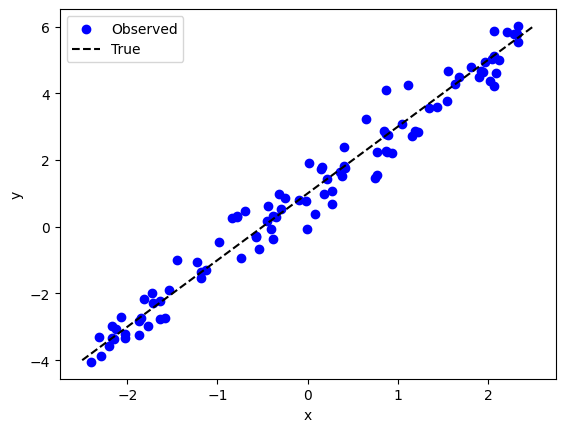

In [7]:
def generate_sample_linear(x, w0=1, w1=2, include_noise=True):

  # สร้างสมการเส้นตรงโดยที่จำลองการใส่สัญญาณรบกวนเข้าไป
  # เลือก include_noise เป็น True เพื่อกำหนดให้มีค่า noise เพิ่มเข้าไปในสมการ
  if include_noise:
    # สร้าง Gaussian noise
    noise = 0.20 * np.max(x) * np.random.randn(*x.shape)
  else:
    noise = 0
  y = w0 + (w1 * x) + noise
  return y

# ทดลองสร้างข้อมูลโดยการเรียกใช้ generate_sample_linear
num_samples = 100
w0_true, w1_true = 1, 2 # กำหนดค่า w0 และ w1 ที่แท้จริง สำหรับสร้างข้อมูล
x = 5 * np.random.rand(num_samples, 1) - 2.5 # สุ่มค่า x จากพิสัย -2.5 ถึง 2.5
y = generate_sample_linear(x, w0_true, w1_true, include_noise=True)

# สร้างข้อมูลที่ไม่มีสัญญาณรบกวนมาเปรียบเทียบ ซึ่งเป็นข้อมูลที่เรามักไม่มีโอกาสเข้าถึงในชีวิตจริง (จะใช้ในภายหลัง)
y_true = generate_sample_linear(x, w0_true, w1_true, include_noise=False)

# สร้างข้อมูลที่ไม่มีสัญญาณรบกวนมาแบบละเอียดสำหรับค่า x จำนวนมาก เพื่อใช้ในการวาดกราฟ (เส้นประสีดำ)
x_whole_line = np.linspace(-2.5, 2.5, 100)
y_true_whole_line = generate_sample_linear(x_whole_line, w0_true, w1_true, include_noise=False)

# Plot ข้อมูล x, y ที่มีอยู่
fig, ax = plt.subplots()
ax.scatter(x, y, c='b', label='Observed')
ax.plot(x_whole_line, y_true_whole_line, 'k--', label='True')
ax.set(xlabel='x', ylabel='y')
ax.legend()
plt.show()


กำหนดให้เรามีจำนวนจุดข้อมูลในรูปด้านบนทั้งหมด $n$ จุด $(x_1,y_1), (x_2,y_2), ..., (x_i,y_i),.., (x_n,y_n)$ แสดงด้วยสีน้ำเงิน หากเราพิจารณาภาพความสัมพันธ์ระหว่าง $x$ กับ $y$ จากการรันโค้ดด้านบน จะพบว่ามีลักษณะคล้ายกับเส้นตรง

**หมายเหตุ** ถึงแม้ว่าในรูปด้านบน เราจะ plot เส้นประสีดำ ซึ่งแสดงความสัมพันธ์ระหว่าง $x$ และ $y$ ที่แท้จริง (ปราศจากสัญญาณรบกวน) ได้ แต่ในชีวิตจริง เรามักจะไม่มีโอกาสเข้าถึงข้อมูลตรงนี้ได้เลย

<br><br>



สมมติว่ามีคนเดินมาถามเราว่า ถ้า $x$ มีค่าเป็น $0.8$ แล้ว $y$ ควรจะมีค่าเป็นเท่าไหร่ เราจะตอบเค้าว่าอย่างไรดี


ในการให้คำตอบตรงนี้ เราสามารถทำได้หลายวิธีมาก ๆ เช่น


*   ถ้าเกิดว่าเราไปไล่ดูจุดข้อมูลทั้ง $n$ จุดในชุดข้อมูลของเรา พบว่ามีจุด $(0.8, 2.6)$ อยู่ เราก็อาจจะตอบได้ว่า $y$ น่าจะมีค่าเป็น $2.6$

*   ถ้าเกิดว่าเราไปไล่ดูจุดข้อมูลทั้ง $n$ จุดในชุดข้อมูลของเรา แต่ไม่พบจุดที่มีค่า $x$ เป็น $0.8$ เลย แต่ดันมีจุด $(0.7, 2.4)$ และ $(0.9, 2.8)$ เราก็อาจจะตอบว่าค่า $y$ ที่สอดคล้องกับค่า $x=0.8$ ซึ่งเป็นจุดกึ่งกลางระหว่าง $x=0.7$ และ $x=0.9$ น่าจะมีค่า $y$ เป็นจุดตรงกลางระหว่าง $2.4$ และ $2.8$ หรือว่ามีค่าเท่ากับ $\frac{2.4+2.8}{2}=2.6$ นั่นเอง

หากสังเกตตัวอย่างด้านบนทั้ง 2 ตัวอย่าง เราจะเห็นว่าทุกครั้งที่เราจะตอบค่า $y$ เราจะต้องไปไล่ดูจุดข้อมูลในชุดข้อมูลของเรา สมมติว่า $n=1,000,000$ ล่ะ เราจะทำอย่างไรกันดี เราพอจะมีวิธีอะไรบางอย่างที่ช่วยให้เราสามารถตอบค่า $y$ ที่เหมาะสมจากค่า $x$ ใด ๆ ก็ตามได้อย่างรวดเร็วหรือไม่

---

เนื่องจากข้อมูลใน plot ด้านบน ดูมีลักษณะเป็นเส้นตรง เรามาทดลองใช้โมเดลที่เป็นสมการเชิงเส้น $\hat{y}=\hat{w_0} + \hat{w_1} x$ กันดีกว่า ซึ่งสมการนี้มี

* $\hat{w_0}$ เป็นค่าจุดตัดแกน $y$

* $\hat{w_1}$ เป็นค่าความชันของเส้นตรง

* $\hat{y}$ เป็นค่า $y$ ที่ทำนายมาจากสมการเส้นตรงของเรา สำหรับค่า $x$ ใด ๆ

ถ้าเกิดว่าเราสามารถหาค่า $\hat{w_0}$ และ $\hat{w_1}$ ที่เหมาะสมออกมาได้ (ซึ่งเราก็หวังว่ามันจะเป็นค่าเดียวกับ $w_0$ และ $w_1$ ของความสัมพันธ์จริง) เราจะสามารถทำนายค่า $y$ เป็น $\hat{w_0} + \hat{w_1} x$ จากค่า $x$ ใด ๆ ได้ทันที โดยที่ไม่ต้องไปนั่งไล่ดูจุดข้อมูลทั้ง $n$ จุดในชุดข้อมูลเลย

ใน code ด้านล่าง เรามาลองปรับค่า $\hat{w_0}$ และ $\hat{w_1}$ กัน เพื่อหาดูว่าค่าที่เหมาะสมมีค่าเป็นเท่าไหร่


In [3]:
# เพิ่มแถบสำหรับปรับค่า w1_hat และ w2_hat
@widgets.interact(w0_hat=widgets.FloatSlider(0.0, min=-4, max=4),
                  w1_hat=widgets.FloatSlider(0.0, min=-4, max=4),
                  show_true_line=widgets.Checkbox(False, description='Show true data'))
def plot_linear_results(w0_hat, w1_hat, show_true_line):

    # คำนวณค่า y จากค่า w0_hat และ w1_hat ที่เราเดามา โดยจะคำนวณมาเฉพาะอันที่มีค่า x ตรงกับที่มีในชุดข้อมูล
    y_predicted_partial = w0_hat + w1_hat * x

    # คำนวณค่า y จากค่า w0_hat และ w1_hat ที่เราเดามา สำหรับค่า x จำนวนมาก
    y_predicted = w0_hat + w1_hat * x_whole_line

    # สร้าง figure
    fig, ax = plt.subplots(figsize=(4,4))

    # Plot ข้อมูล x, y ที่มีอยู่ด้วยสีน้ำเงิน
    ax.scatter(x, y, c='b', label='Observed')

    # Plot ข้อมูลค่า y ที่เราทำนายมาที่ตำแหน่งค่า x ต่าง ๆ กัน ด้วยสีแดง
    ax.plot(x_whole_line, y_predicted, c='r', label='Predicted')

    # Plot ข้อมูลที่ไม่มี noise ด้วยสีดำ ซึ่งในความเป็นจริง เรามักไม่มีโอกาสเข้าถึงข้อมูลตรงนี้
    if show_true_line:
        ax.plot(x_whole_line, y_true_whole_line, 'k--', label='True')

    ax.set(xlabel='x', ylabel='y')
    ax.legend()
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='w0_hat', max=4.0, min=-4.0), FloatSlider(value=0.0, …

จะเห็นได้ว่าเราสามารถลองปรับค่าความชันและจุดตัดแกน $y$ ของเส้นตรงไปเรื่อย ๆ จนมีความสอดคล้องกับชุดข้อมูลที่เราเก็บมา (สีน้ำเงิน)

หากเรากำหนดให้ค่า $\hat{w_0}=1$ และ $\hat{w_1}=2$ จะพบว่าเส้นตรงสีแดงมีความสอดคล้องกับจุดสีน้ำเงินค่อนข้างดี โดยเส้นตรงนั้นมีสมการคือ $y = 2x + 1$ ซึ่งเป็นเส้นตรงที่มีความชันเป็น $2$ และมีจุดตัดแกน $y$ คือ $(0,1)$



อีกวิธีหนึ่งที่อาจจะช่วยให้เราเลือกค่า $\hat{w_0}$ และ $\hat{w_0}$ ด้วยตาได้ง่ายขึ้น คือการ plot โชว์ความแตกต่างระหว่างจุดที่ observed มา (สีน้ำเงิน) และสิ่งที่โมเดลทำนายออกมา (สีแดง) ดังตัวอย่างโค้ดด้านล่าง โดยเราจะพยายามเลือกเอาค่า $\hat{w_0}$ และ $\hat{w_0}$ ที่ทำให้เส้นสีส้ม ๆ ในรูปมีขนาดรวมกันสั้นที่สุด ซึ่งเส้นสีส้มแต่ละเส้นมีชื่อเรียกว่า residual


In [8]:
# เพิ่มแถบสำหรับปรับค่า w1_hat และ w2_hat
@widgets.interact(w0_hat=widgets.FloatSlider(0.0, min=-4, max=4),
                  w1_hat=widgets.FloatSlider(0.0, min=-4, max=4),
                  show_true_line=widgets.Checkbox(False, description='Show true data'),
                  show_residual=widgets.Checkbox(True, description='Show residual'))
def plot_linear_results(w0_hat, w1_hat, show_true_line, show_residual):

    # คำนวณค่า y จากค่า w0_hat และ w1_hat ที่เราเดามา สำหรับค่า x จำนวนมาก
    y_predicted = w0_hat + w1_hat * x_whole_line

    # สร้าง figure
    fig, ax = plt.subplots(figsize=(4,4))

    # Plot ข้อมูล x, y ที่มีอยู่ด้วยสีน้ำเงิน
    ax.scatter(x, y, c='b', label='Observed')

    # Plot ข้อมูลค่า y ที่เราทำนายมาที่ตำแหน่งค่า x ต่าง ๆ กัน ด้วยสีแดง
    ax.plot(x_whole_line, y_predicted, c='r', label='Predicted')

    # Plot ข้อมูลที่ไม่มี noise ด้วยสีดำ ซึ่งในความเป็นจริง เรามักไม่มีโอกาสเข้าถึงข้อมูลตรงนี้
    if show_true_line:
        ax.plot(x_whole_line, y_true_whole_line, 'k--', label='True')

    # Plot ความแตกต่างระหว่างค่า y ที่ observed มา และค่า y ที่ทำนายมาด้วยสีส้ม
    if show_residual:

        # คำนวณค่า y จากค่า w0_hat และ w1_hat ที่เราเดามา โดยจะคำนวณมาเฉพาะอันที่มีค่า x ตรงกับที่มีในชุดข้อมูล
        y_predicted_partial = w0_hat + w1_hat * x

        ymin = np.minimum(y, y_predicted_partial)
        ymax = np.maximum(y, y_predicted_partial)
        ax.vlines(x, ymin, ymax, 'darkorange', alpha=0.3, label='Residuals')

    ax.set(xlabel='x', ylabel='y')
    ax.legend()
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='w0_hat', max=4.0, min=-4.0), FloatSlider(value=0.0, …

ที่ผ่านมาเราเลือกค่า $\hat{w_0}$ และ $\hat{w_0}$ โดยการดูด้วยตาว่าเส้นตรงสีแดงที่เกิดขึ้นมานั้น ดูสอดคล้องกับจุดข้อมูลสีน้ำเงินมากน้อยแค่ไหน ซึ่งนับว่าเป็นจากวัดความเหมือนหรือความแตกต่างเชิงคุณภาพ (qualitative)

ในลำดับถัดไป เราจะมาลองดูวิธีการวัดความเหมือนหรือความแตกต่างเชิงปริมาณกันบ้าง (quantitative)

เรามาลองใช้ฟังก์ชัน $L(y_{i},\hat{y_i})$ สำหรับวัดความต่างระหว่าง $y_{i}$ และ $\hat{y_i}$ ออกมาเป็นตัวเลข 1 ตัว โดยการนำเอาค่าทั้งสองมาลบกันแล้วยกกำลังสอง

$$L(y_{i},\hat{y_i}) = (y_{i} - \hat{y_i})^2$$

*   ถ้าหากเราพยายามนำเอาสมการนี้ไปตีความทางเรขาคณิต เราจะเห็นว่าค่า $y_{i} - \hat{y_i}$ แสดงถึง"ความยาว"ของเส้นสีส้มแต่ละเส้นในโค้ดของ cell ก่อนหน้า ซึ่งแปลว่าค่า $L(y_{i},\hat{y_i})$ นี้ ก็คือค่าความยาวของเส้นสีส้มยกกำลังสองนั่นเอง
*   ถ้า $L(y_{i},\hat{y_i})$ มีค่าน้อย แสดงว่า $y_{i}$ กับ $\hat{y_i}$ มีความแตกต่างกันน้อย (เส้นสีส้มจะสั้น)
*   ถ้า $L(y_{i},\hat{y_i})$ มีค่ามาก แสดงว่า $y_{i}$ และ $\hat{y_i}$ มีความแตกต่างกันมาก (เส้นสีส้มจะยาว)


ชุดข้อมูลของเรามีทั้งหมด $n$ จุด ซึ่งหากเราต้องการวัดความแตกต่างในระดับชุดข้อมูล เราก็สามารถเอาค่า $L(y_{i},\hat{y_i})$ จากแต่ละจุดข้อมูลมาเฉลี่ยกันได้ เกิดเป็นสมการ

$$L(Y,\hat{Y}) =\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y_i}\right)^{2}$$

ที่มีชื่อเรียกอีกว่า mean squared error (MSE) โดยในที่นี้เราใช้สัญลักษณ์

* $Y$ เพื่ออ้างอิงถึง $y_1, y_2, ..., y_i, ..., y_n$

* $\hat{Y}$ เพื่ออ้างอิงถึง $\hat{y_1}, \hat{y_2}, ..., \hat{y_i}, ..., \hat{y_n}$

หากเราย้อนกลับไปที่ตัวอย่างด้านบนที่เราพยายามปรับค่า $\hat{w_0} และ \hat{w_1}$ (จุดตัดแกน $y$ และค่าความชัน ตามลำดับ) แทนที่เราจะวัดผลด้วยตา เราสามารถลองใช้ $L$ สำหรับช่วยในการวัดผล โดยสุดท้ายแล้ว เราจะเลือกค่า $\hat{w_0} และ \hat{w_1}$ ที่ทำให้ $L$ มีค่าน้อยที่สุด

อย่างไรก็ตาม การทดลองสุ่มค่าไปเรื่อย ๆ ในลักษณะนี้ เป็นวิธีการที่ใช้เวลานานมาก และไม่ค่อยมีประสิทธิภาพ

<br><br>

หากเรามองออกว่าโจทย์ที่เราพยายามแก้อยู่ เป็นโจทย์การหาค่าต่ำสุดของฟังก์ชัน $L$ ซึ่งสามารถเขียนในทางคณิตศาสตร์ได้ว่า

$$
\min_{\hat{w_{0}},\hat{w_{1}}}L(Y,\hat{Y})
=\min_{\hat{w_{0}},\hat{w_{1}}}\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y_i}\right)^{2}
= \min_{\hat{w_{0}},\hat{w_{1}}}\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-(\hat{w_{0}}+\hat{w_{1}}x_{i})\right)^{2}
$$

เราก็สามารถเอาเครื่องมือทางคณิตศาสตร์ (เช่น calculus, สถิติ และ linear algebra) มาแก้โจทย์ข้อนี้ได้ ซึ่งคำตอบที่ $\hat{w_{0}}$ และ $\hat{w_{1}}$ ที่ได้รับจากการแก้โจทย์ข้อนี้ ก็คือคำตอบที่ทำให้เส้นตรงของเรามีความแตกต่างจากข้อมูลที่เราเก็บมาน้อยที่สุดภายใต้มาตรวัดประเภทนี้ หรือพูดอีกอย่างว่ามีความเหมือนที่สุดนั่นเอง


**หมายเหตุ** เนื่องจาก $L$ ในที่นี้แสดงถึงความแตกต่าง ซึ่งเราต้องการหาคำตอบที่ทำให้มันมีค่าน้อย (ความสูญเสียน้อย) เรามักจะเรียก $L$ ในบริบทนี้ว่า loss function


---

เนื่องจากมีผู้เรียนจำนวนหนึ่งยังไม่มีโอกาสได้เรียนเนื้อหาทางคณิตศาสตร์ที่จำเป็นต่อการแก้โจทย์ข้อนี้ (เช่น การใช้ calculus และ linear algebra) เราจะแก้โจทย์ข้อนี้ผ่านการเรียกใช้ `LinearRegression` จากไลบรารี่ `scikit-learn` เลย

In [5]:
model_linear = LinearRegression()

# ให้โมเดลหาค่า w_0 and w_1 จากข้อมูล (x,y) ทั้งหมดที่มี
model_linear.fit(x, y)
w0_hat = model_linear.intercept_[0]
w1_hat = model_linear.coef_[0][0]

print(f"True slope {w1_true:0.2f}")
print(f"Estimated slope {w1_hat:0.2f}\n")
print(f"True intercept {w0_true:0.2f}")
print(f"Estimated intercept {w0_hat:0.2f}")

True slope 2.00
Estimated slope 1.97

True intercept 1.00
Estimated intercept 0.93


จะเห็นว่าความชันและจุดตัดแกน $y$ ที่ประมาณจากโมเดล linear regression มีค่าใกล้กับค่าที่เรากำหนดมาตอนสร้างชุดข้อมูล

หลังจากที่เรา fit โมเดลแล้ว (โมเดลได้ทำการประมาณค่า $\hat{w_0}$ และ $\hat{w_1}$ เรียบร้อยแล้ว) เราสามารถทำนายค่า $y$ จาก $x$ ใดๆ ได้จากสมการ $ \hat{y} = \hat{w_0} + \hat{w_1}x$ ได้โดยตรง หรือผ่านการเรียกใช้ฟังก์ชัน `predict` ได้เช่นกัน

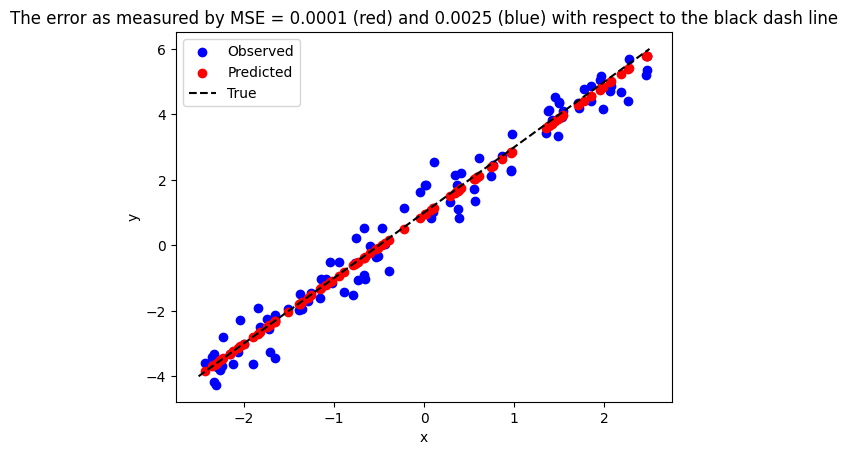

In [6]:
# ใช้โมเดลทำนายค่า y จากค่า x วิธีที่ 1
y_hat = w0_hat + w1_hat*x

# ใช้โมเดลทำนายค่า y จากค่า x วิธีที่ 2
# y_hat = model_linear.predict(x)

# วัด mean squared error จากการทำนาย
def mse(y,y_hat):
  return np.mean((y-y_hat)**2)/y.shape[0]

mse_val = mse(y_true, y_hat)
mse_val_noisy = mse(y_true, y)

# แสดงผลการทำนาย
fig, ax = plt.subplots()
ax.scatter(x, y, c='b', label='Observed')
ax.set(xlabel='x', ylabel='y')
ax.scatter(x, y_hat, c='r', label='Predicted')
ax.plot(x_whole_line, y_true_whole_line, 'k--', label='True')
ax.legend()
ax.set_title(f"The error as measured by MSE = {mse_val:0.4f} (red) and {mse_val_noisy:0.4f} (blue) with respect to the black dash line")
plt.show()

จากการสังเกตด้วยตา จะเห็นว่าค่า $y$ ที่โมเดลได้ทำนายออกมา (จุดสีแดง) มีความสอดคล้องกับความสัมพันธ์ระหว่าง $x$ และ $y$ ที่แท้จริง (เส้นประสีดำ) มากกว่าข้อมูลที่เราเก็บมาเสียอีก (จุดสีน้ำเงิน)

นอกจากนั้น เราก็ได้ใช้ loss function ตัวเดิม

$$MSE(Y,\hat{Y}) = L(Y,\hat{Y}) =\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y_i}\right)^{2}$$

มาเป็นมาตรวัดความเหมือน/ความคล้ายระหว่างชุดข้อมูลเชิงปริมาณ และพบว่า MSE ระหว่างค่า $y$ ของจุดสีแดงกับค่า $y$ ที่มาจากความสัมพันธ์ที่แท้จริง (สีดำ) มีค่าต่ำกว่า MSE ระหว่างค่า $y$ ที่เราเก็บมาซึ่งมีสัญญาณรบกวน​ (สีน้ำเงิน) กับ ค่า $y$ ที่มาจากความสัมพันธ์ที่แท้จริง (สีดำ)

จะเห็นได้ว่าการเปรียบเทียบทั้งแบบเชิงคุณภาพและเชิงปริมาณมีความสอดคล้องกันในระดับหนึ่ง


<br><br>
MSE เป็นแค่หนึ่งในวิธีสำหรับวัดผล (evaluation metric) เท่านั้น ยังมีอีกหลายวิธีที่ใช้วัดผลออกมาเป็นตัวเลข เช่น mean absolution error (MAE), accuracy, F-score ฯลฯ ซึ่ง evaluation metric แต่ละอัน วัดค่าความเหมือนหรือความแตกต่างด้วยการใช้มาตรวัดคนละตัว ซึ่งมีเหมาะกับสถานการณ์ที่แตกต่างกัน

ใน module นี้ เราจะใช้ MSE เป็น evaluation metric ไปก่อน แต่ใน module ถัด ๆ ไป หรือการทำงานจริง เราจะได้เห็น evaluation metric ที่หลากหลายมากยิ่งขึ้น